<a href="https://colab.research.google.com/github/akmalmnaim/ML_284_281/blob/main/Project_Kelompok_CNN_Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas**

Melanjutkan tugas kelompok di modul sebelumya sekarang kerjakan beberapa poin berikut untuk didemokan kepada asisten masing-masing.

*   Melakukan proses preprocessing dataset
*   Melakukan training beberapa skema model menggunakan model CNN sederhana buatan sendiri (minimal 2 model) tidak diperbolehkan menggunakan transfer learning
*   Menyimpan model yang telah di training kedalam file .h5 Lihat disini
*   Mencatat hasil perkembangan tugas kelompok dalam file sprint_project.xlsx tandai masing-masing task dengan status Done untuk task yang telah selesai dikerjakan, On Going untuk task yang dalam proses pengerjaan, Waiting untuk task yang belum atau akan dikerjakan
*   Pastikan anda menulis tanggal mulai dan tanggal selesai masing-masing task dengan benar
*   Pastikan anda menulis penanggung jawab masing-masing task (Penanggung jawab bertugas menyelesaikan dan menuntaskan masing-masing task yang diberikan)
commit dan push seluruh perkerjaan yang anda lakukan kedalam branch pribadi dalam repository tugas kelompok yang telah anda buat sebelumnya.
*   Presentasikan kepada asisten tentang apa yang anda lakukakan selama mengerjakan tugas kelompok ini. Ceritakan tentang tugas masing-masing anggota, kendala dalam mengerjakan tugas sampai solusi yang anda lakukan saat mengerjakan tugas kelompok ini.



In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
cd gdrive/MyDrive/Praktikum ML/Project Kelompok

/content/gdrive/MyDrive/Praktikum ML/Project Kelompok


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (4).json


{'kaggle.json': b'{"username":"qhistinj","key":"f709ed7ce69d920f8a14f668fff276cd"}'}

In [ ]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [ ]:
!cp kaggle.json /.kaggle

In [ ]:
ls

'kaggle (1).json'  'kaggle (3).json'   kaggle.json
'kaggle (2).json'  'kaggle (4).json'


In [ ]:
cd

/root


In [ ]:
! pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
api_token = {"username":"qhistinj","key":"f709ed7ce69d920f8a14f668fff276cd"}
import json
import zipfile
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
ls

chest_xray/  chest-xray-pneumonia.zip


In [ ]:
import os
import zipfile

local_zip = 'chest-xray-pneumonia.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('')
zip_ref.close()

In [4]:
import os
import zipfile

In [5]:
ls

 chest_xray/                kaggle.json                  output/
 chest-xray-pneumonia.zip   model1.h5                   'Project Kelompok'/
 foo.svg                    model_dengan_augmentasi.h5


In [6]:
base_dir = 'chest_xray/chest_xray'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_normal_dir = os.path.join(train_dir, 'NORMAL')
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')

val_normal_dir = os.path.join(val_dir, 'NORMAL')
val_pneumonia_dir = os.path.join(val_dir, 'PNEUMONIA')

test_normal_dir = os.path.join(test_dir, 'NORMAL')
test_pneumonia_dir = os.path.join(test_dir, 'PNEUMONIA')

In [7]:
# Cek penamaan image yang ada di folder train_normal_dir dan train_pneumonia_dir
print(os.listdir(train_normal_dir)[:10])
print(os.listdir(train_pneumonia_dir)[:10])

['IM-0524-0001.jpeg', 'IM-0525-0001-0001.jpeg', 'IM-0525-0001-0002.jpeg', 'IM-0525-0001.jpeg', 'IM-0526-0001.jpeg', 'IM-0527-0001.jpeg', 'IM-0528-0001.jpeg', 'IM-0529-0001.jpeg', 'IM-0530-0001.jpeg', 'IM-0531-0001-0001.jpeg']
['person540_bacteria_2271.jpeg', 'person540_bacteria_2272.jpeg', 'person540_bacteria_2273.jpeg', 'person540_virus_1070.jpeg', 'person541_bacteria_2274.jpeg', 'person541_bacteria_2275.jpeg', 'person541_virus_1071.jpeg', 'person542_bacteria_2276.jpeg', 'person542_virus_1072.jpeg', 'person543_bacteria_2279.jpeg']


In [8]:
# Cek jumlah data train dan data validation
print('total training normal images:', len(os.listdir(train_normal_dir)))
print('total training pneumonia images:', len(os.listdir(train_pneumonia_dir)))
print('total val normal images:', len(os.listdir(val_normal_dir)))
print('total val pneumonia images:', len(os.listdir(val_pneumonia_dir)))
print('total test normal images:', len(os.listdir(test_normal_dir)))
print('total test pneumonia images:', len(os.listdir(test_pneumonia_dir)))

total training normal images: 1342
total training pneumonia images: 3876
total val normal images: 9
total val pneumonia images: 9
total test normal images: 234
total test pneumonia images: 390


In [9]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (250,250))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [10]:
# Gather data train
val_data = []
val_label = []
for r, d, f in os.walk(val_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (250,250))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [11]:
# Gather data train
test_data = []
test_label = []
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (250,250))
            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)

test_data = np.array(train_data)
test_label = np.array(train_label)

In [12]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)
print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)

Train Data =  (5216, 250, 250, 3)
Train Label =  (5216,)
Validation Data =  (16, 250, 250, 3)
Validation Label =  (16,)
Test Data =  (5216, 250, 250, 3)
Test Label =  (5216,)


In [13]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
x_test = test_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [0 0 0]
Data setelah di-normalisasi  [0. 0. 0.]


In [14]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[1:10])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)
y_test = lb.fit_transform(test_label)

print("Label setelah di-encoder ", y_train[1:10])

Label sebelum di-encoder  ['NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL'
 'NORMAL']
Label setelah di-encoder  [0 0 0 0 0 0 0 0 0]


# **Modelling**

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, GlobalMaxPool2D, Conv2D, MaxPool2D, Flatten

In [16]:
# Scenario Pertama
# Dengan GlobalMaxPooling

# Feature Extraction Layer
model1 = Sequential()
model1.add(InputLayer(input_shape = [250,250,3]))
model1.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=2, padding='same'))

model1.add(GlobalMaxPool2D())
model1.add(Flatten())

# Fully Connected Layer
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

# Summary Scenario Pertama
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0

In [17]:
# Compile model
from tensorflow.keras.optimizers import Adam

model1.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [18]:
# Training model scenario Pertama
Training_model1 = model1.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
163/163 [==============================] - 283s 2s/step - loss: 0.3341 - acc: 0.8566 - val_loss: 2.2642 - val_acc: 0.5625
Epoch 2/10
163/163 [==============================] - 285s 2s/step - loss: 0.1960 - acc: 0.9195 - val_loss: 0.9388 - val_acc: 0.6875
Epoch 3/10
163/163 [==============================] - 285s 2s/step - loss: 0.1774 - acc: 0.9287 - val_loss: 0.7777 - val_acc: 0.6875
Epoch 4/10
163/163 [==============================] - 282s 2s/step - loss: 0.1681 - acc: 0.9327 - val_loss: 1.4969 - val_acc: 0.5625
Epoch 5/10
163/163 [==============================] - 282s 2s/step - loss: 0.1458 - acc: 0.9394 - val_loss: 0.9801 - val_acc: 0.6250
Epoch 6/10
163/163 [==============================] - 283s 2s/step - loss: 0.1357 - acc: 0.9423 - val_loss: 0.8924 - val_acc: 0.6250
Epoch 7/10
163/163 [==============================] - 284s 2s/step - loss: 0.1263 - acc: 0.9492 - val_loss: 0.7335 - val_acc: 0.7500
Epoch 8/10
163/163 [==============================] - 284s 2s/step - 

In [19]:
x_val

array([[[[0.6392157 , 0.6392157 , 0.6392157 ],
         [0.01176471, 0.01176471, 0.01176471],
         [0.05098039, 0.05098039, 0.05098039],
         ...,
         [0.30588236, 0.30588236, 0.30588236],
         [0.29411766, 0.29411766, 0.29411766],
         [0.2627451 , 0.2627451 , 0.2627451 ]],

        [[0.01568628, 0.01568628, 0.01568628],
         [0.00392157, 0.00392157, 0.00392157],
         [0.7294118 , 0.7294118 , 0.7294118 ],
         ...,
         [0.29411766, 0.29411766, 0.29411766],
         [0.2627451 , 0.2627451 , 0.2627451 ],
         [0.26666668, 0.26666668, 0.26666668]],

        [[0.6156863 , 0.6156863 , 0.6156863 ],
         [0.        , 0.        , 0.        ],
         [0.02745098, 0.02745098, 0.02745098],
         ...,
         [0.3019608 , 0.3019608 , 0.3019608 ],
         [0.25490198, 0.25490198, 0.25490198],
         [0.23921569, 0.23921569, 0.23921569]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [20]:
#Clasification Report
from sklearn.metrics import classification_report

pred = model1.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1341
           1       1.00      0.93      0.96      3875

    accuracy                           0.95      5216
   macro avg       0.92      0.96      0.94      5216
weighted avg       0.96      0.95      0.95      5216



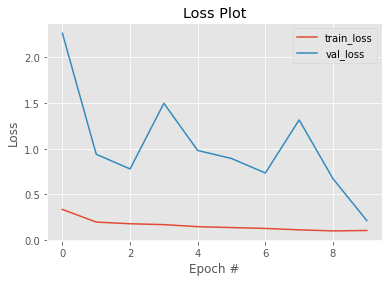

In [21]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), Training_model1.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), Training_model1.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

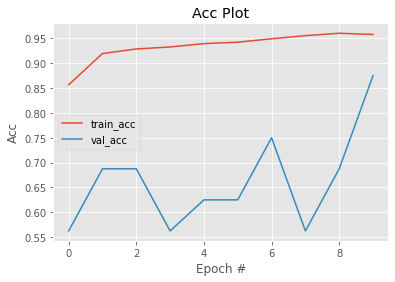

In [22]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), Training_model1.history["acc"], label="train_acc")
plt.plot(np.arange(0, 10), Training_model1.history["val_acc"], label="val_acc")
plt.title("Acc Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [24]:
!pip install pyyaml h5py

In [27]:
model1.save("model1.h5")

In [26]:
plt.savefig('plot.svg', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>